# Quantum Battery in Qubit = 3

Milou van Nederveen

Quantum Inspire Starmon-5

Dates of experiment: 12/12, 13/12

In [2]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt
from qiskit import IBMQ, QuantumCircuit, pulse, schedule, transpile
from scipy.optimize import curve_fit


QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

authentication = get_authentication()
#authentication = set_authentication('API',QI_URL)
QI.set_authentication(authentication, QI_URL)

backend = QI.get_backend('Starmon-5')

font = {'family':'serif'}

In [3]:
def finding_value(counts,qubit,shots):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/shots

In [4]:
dataQ=[]

In [8]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 20
shots = 1024
y_values = []
qubit=3

#for t in theta:
#    qr = QuantumRegister(5)
#    cr = ClassicalRegister(5)
#    qc = QuantumCircuit(qr,cr)
    
#    qc.rx(t,qubit)
#    qc.measure(qr[qubit],cr[qubit])
    
#    job = backend.run(qc,shots)
#    counts = job.result().get_counts()
    
#    y = finding_value(counts,qubit,shots)
#    y_values.append(y)

dataQ.append(y_values)

In [9]:
print(dataQ)

[[0.015625, 0.015625, 0.048828125, 0.125, 0.158203125, 0.2236328125, 0.314453125, 0.451171875, 0.55078125, 0.6630859375, 0.74609375, 0.8466796875, 0.8876953125, 0.939453125, 0.9658203125, 0.9853515625], [0.0029296875, 0.0107421875, 0.0341796875, 0.11328125, 0.1328125, 0.263671875, 0.3271484375, 0.443359375, 0.5146484375, 0.66015625, 0.740234375, 0.822265625, 0.8642578125, 0.923828125, 0.9697265625, 0.9765625], [0.001953125, 0.013671875, 0.044921875, 0.1318359375, 0.12890625, 0.23828125, 0.3173828125, 0.4365234375, 0.580078125, 0.654296875, 0.755859375, 0.83203125, 0.8935546875, 0.9365234375, 0.96484375, 0.9853515625], [0.001953125, 0.0166015625, 0.0576171875, 0.1279296875, 0.15625, 0.2265625, 0.3212890625, 0.4267578125, 0.5654296875, 0.6396484375, 0.7626953125, 0.8564453125, 0.87890625, 0.9208984375, 0.9814453125, 0.978515625], [0.00390625, 0.017578125, 0.0654296875, 0.08984375, 0.158203125, 0.2236328125, 0.3447265625, 0.466796875, 0.5556640625, 0.662109375, 0.7529296875, 0.8466796875,

In [10]:
dataQ=[[0.015625, 0.015625, 0.048828125, 0.125, 0.158203125, 0.2236328125, 0.314453125, 0.451171875, 0.55078125, 0.6630859375, 0.74609375, 0.8466796875, 0.8876953125, 0.939453125, 0.9658203125, 0.9853515625], [0.0029296875, 0.0107421875, 0.0341796875, 0.11328125, 0.1328125, 0.263671875, 0.3271484375, 0.443359375, 0.5146484375, 0.66015625, 0.740234375, 0.822265625, 0.8642578125, 0.923828125, 0.9697265625, 0.9765625], [0.001953125, 0.013671875, 0.044921875, 0.1318359375, 0.12890625, 0.23828125, 0.3173828125, 0.4365234375, 0.580078125, 0.654296875, 0.755859375, 0.83203125, 0.8935546875, 0.9365234375, 0.96484375, 0.9853515625], [0.001953125, 0.0166015625, 0.0576171875, 0.1279296875, 0.15625, 0.2265625, 0.3212890625, 0.4267578125, 0.5654296875, 0.6396484375, 0.7626953125, 0.8564453125, 0.87890625, 0.9208984375, 0.9814453125, 0.978515625], [0.00390625, 0.017578125, 0.0654296875, 0.08984375, 0.158203125, 0.2236328125, 0.3447265625, 0.466796875, 0.5556640625, 0.662109375, 0.7529296875, 0.8466796875, 0.8759765625, 0.9443359375, 0.9716796875, 0.9873046875], [0.001953125, 0.015625, 0.05078125, 0.1005859375, 0.1513671875, 0.2265625, 0.337890625, 0.44140625, 0.5390625, 0.673828125, 0.7470703125, 0.841796875, 0.876953125, 0.9345703125, 0.97265625, 0.9833984375], [0.01171875, 0.0087890625, 0.056640625, 0.1181640625, 0.1513671875, 0.228515625, 0.3310546875, 0.416015625, 0.533203125, 0.662109375, 0.7607421875, 0.8349609375, 0.8818359375, 0.9345703125, 0.97265625, 0.9873046875], [0.0126953125, 0.0244140625, 0.048828125, 0.095703125, 0.134765625, 0.23046875, 0.326171875, 0.4345703125, 0.55078125, 0.6650390625, 0.7548828125, 0.8408203125, 0.892578125, 0.935546875, 0.9736328125, 0.9892578125], [0.001953125, 0.0126953125, 0.05078125, 0.1123046875, 0.111328125, 0.2451171875, 0.2978515625, 0.4453125, 0.560546875, 0.6416015625, 0.7724609375, 0.833984375, 0.86328125, 0.9326171875, 0.966796875, 0.984375], [0.001953125, 0.0126953125, 0.0498046875, 0.1298828125, 0.1650390625, 0.2255859375, 0.3212890625, 0.416015625, 0.5537109375, 0.6484375, 0.7470703125, 0.8369140625, 0.869140625, 0.9306640625, 0.9765625, 0.98046875]]


In [11]:
len(dataQ)

10

## Plotting the raw data

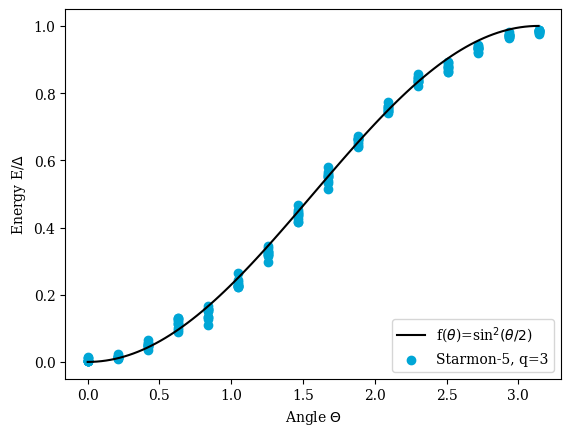

In [12]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(dataQ)):
    plt.scatter(theta,dataQ[i],color=tud_color)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=3"], prop=font, loc="lower right")
plt.show()

## Mean values & Errors

In [13]:
dataF=np.array(dataQ)
data=dataF.transpose()

In [14]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)

Mean values: [0.0056640625, 0.01484375, 0.05078125, 0.114453125, 0.14482421875, 0.233203125, 0.32392578125, 0.43779296875, 0.550390625, 0.65703125, 0.75400390625, 0.8392578125, 0.87841796875, 0.93330078125, 0.97158203125, 0.9837890625]


In [15]:
#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)

Standard Deviation: [0.005145289012624801, 0.004092251335890032, 0.007836876034273, 0.014150387255218716, 0.01613575610630225, 0.012062029419253524, 0.01232985088224186, 0.014842786255720584, 0.017178619865075018, 0.010323886942501961, 0.009029375244698289, 0.008984375, 0.01025390625, 0.006551708249109183, 0.004832751184241649, 0.003886669676197734]


In [16]:
#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)

Standard Error: [0.0016270832499733227, 0.0012940834979279254, 0.002478237800869047, 0.00447474534999095, 0.005102574106488511, 0.0038143486168799186, 0.003899041199812081, 0.0046937011391119466, 0.005432356583185146, 0.0032646997044377983, 0.002855339162158679, 0.0028411088353075277, 0.003242569866383592, 0.0020718320632098853, 0.0015282501107079646, 0.001229072868949396]


In [17]:
#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)

Maximum values: [0.015625, 0.0244140625, 0.0654296875, 0.1318359375, 0.1650390625, 0.263671875, 0.3447265625, 0.466796875, 0.580078125, 0.673828125, 0.7724609375, 0.8564453125, 0.8935546875, 0.9443359375, 0.9814453125, 0.9892578125]
Minimum values: [0.001953125, 0.0087890625, 0.0341796875, 0.08984375, 0.111328125, 0.2236328125, 0.2978515625, 0.416015625, 0.5146484375, 0.6396484375, 0.740234375, 0.822265625, 0.86328125, 0.9208984375, 0.96484375, 0.9765625]


## Plot mean values with error bars

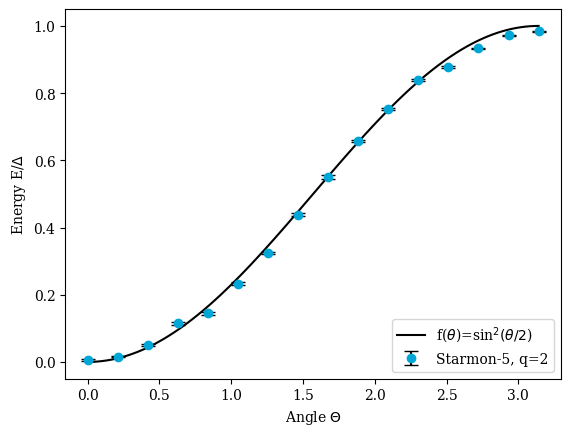

<Figure size 640x480 with 0 Axes>

In [18]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_err, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=2"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q1-error-stdev.png')

In [19]:
max(mean_values)

0.9837890625

## Fit function

In [20]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [21]:
guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

print(fit_a)
print(fit_b)

0.9915306560628733
-0.09655475220300411


In [ ]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

In [ ]:
fit_sin2 = sin2_func(xdata, fit_a, fit_b)

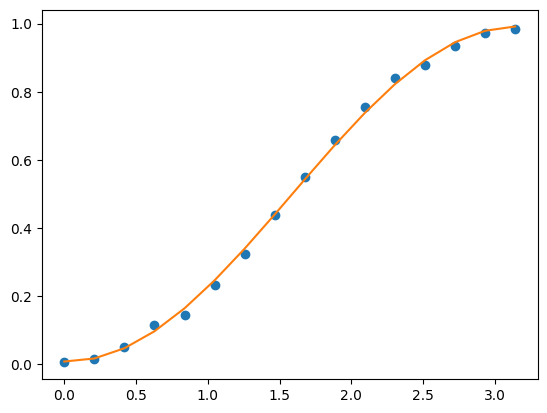

In [55]:
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_sin2 , '-', label='fit')

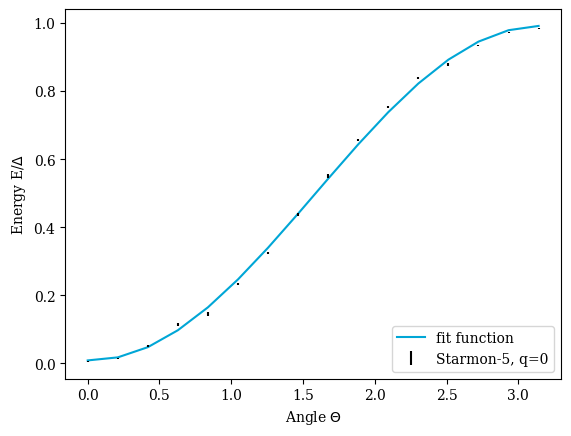

In [58]:
plt.plot(xdata, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["fit function", "Starmon-5, q=0"], prop=font, loc="lower right")

plt.savefig('starmon-5-q3-fit.png')